In [1]:
import pandas as pd # pandas is a data analytics package for python
import matplotlib.pyplot as plt # matplotlib is a graphing package for python
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import data_analyzer as analyzer
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [2]:
df = pd.read_csv('elem_school.csv')
df = df.dropna()
df.head(n=5) # read the first five rows

,school_name,test_id,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,dropouts_per_enrollment,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0,A. E. Arnold Elementary,ela,728,False,0.268,0.363,24.266667,728.0,17,15,0,0.0,4606.979762,0.687674
1,A. E. Arnold Elementary,math,728,False,0.268,0.363,24.266667,728.0,17,15,0,0.0,4606.979762,0.620166
2,A. J. Cook Elementary,ela,355,False,0.499,0.643,21.515152,355.0,17,17,0,0.0,5809.952892,0.770904
3,A. J. Cook Elementary,math,355,False,0.499,0.643,21.515152,355.0,17,17,0,0.0,5809.952892,0.777819
4,A. J. Dorsa Elementary,ela,489,False,0.759,0.908,25.076923,489.0,16,13,0,0.0,7096.845521,0.317868


In [3]:
df = df[df['test_id'] == "math"]
print "Number of schools in the dataset:", len(df.index) # count number of schools

Number of schools in the dataset: 3710


In [4]:
analyzer.plot_enrollment_frpm(df)

TypeError: bar() takes at least 2 arguments (2 given)

In [5]:
analyzer.plot_stratio_frpm(df)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [6]:
analyzer.plot_saratio_frpm(df)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [7]:
analyzer.plot_susp_frpm(df)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

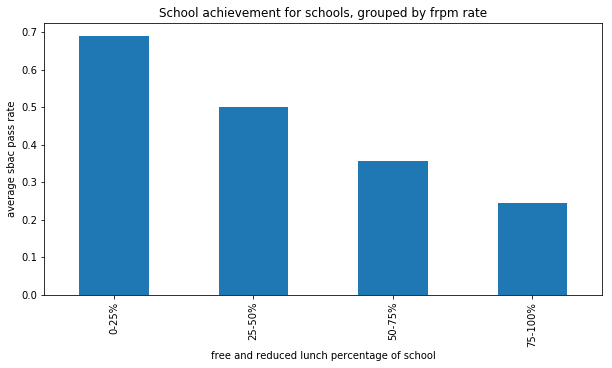

In [11]:
analyzer.plot_sbac_frpm(df)
plt.xlabel('free and reduced lunch percentage of school')
plt.title('School achievement for schools, grouped by frpm rate')
plt.show() 

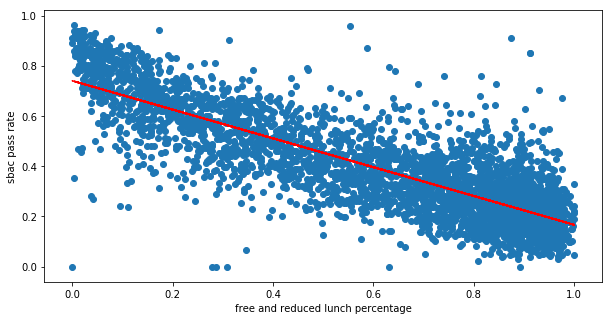

In [10]:
analyzer.plot_sbac_frpm_scatter(df)

17      0.872
19      0.973
23      0.576
25      0.278
29      0.980
31      0.955
51      0.245
87      0.208
89      0.104
129     1.000
177     0.468
185     0.185
287     0.850
297     0.794
359     0.976
363     0.050
371     0.754
373     0.927
375     0.766
377     0.858
379     0.933
381     0.888
383     0.892
385     0.938
387     0.920
389     0.919
391     0.961
393     0.669
395     0.766
397     0.556
        ...  
6627    0.486
6669    0.955
6719    0.804
6821    0.781
6849    0.059
6853    0.398
6971    0.364
6975    0.121
6979    0.573
7019    0.867
7023    0.266
7049    0.329
7109    0.811
7117    0.065
7119    0.747
7123    0.496
7127    0.893
7187    0.991
7277    0.888
7299    0.119
7353    0.210
7371    0.165
7377    0.072
7381    0.552
7385    0.022
7391    0.492
7401    0.152
7407    0.771
7545    0.313
7547    0.122
Name: fr_percent, Length: 226, dtype: float64


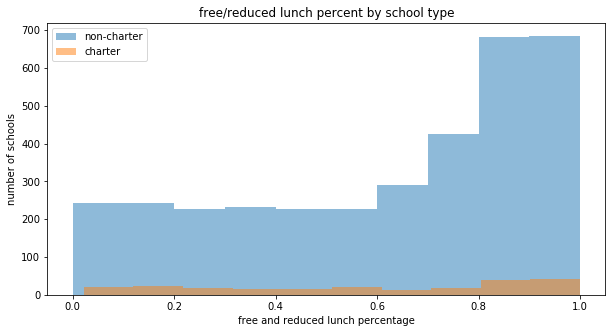

Average free and reduced lunch percentage at charter schools is: 0.583345132743
Average free and reduced lunch percentage at noncharter schools is: 0.61679391504


In [11]:
analyzer.plot_charter_frpm_compare(df)

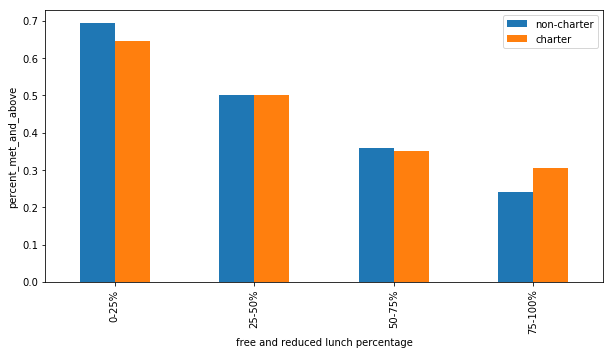

In [12]:
analyzer.plot_charter_noncharter_sbac(df)

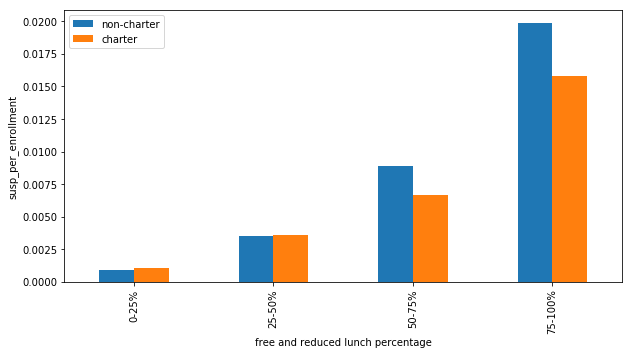

In [13]:
analyzer.plot_charter_noncharter_susp(df)

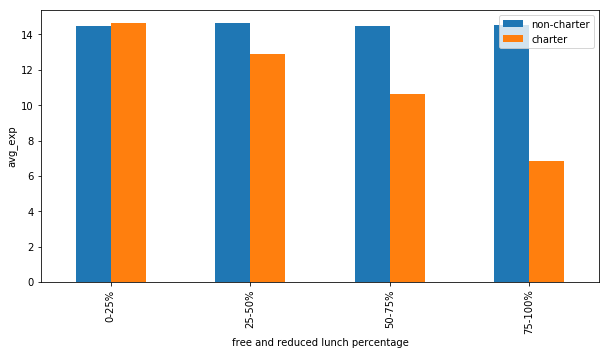

In [14]:
analyzer.plot_charter_noncharter_exp(df)

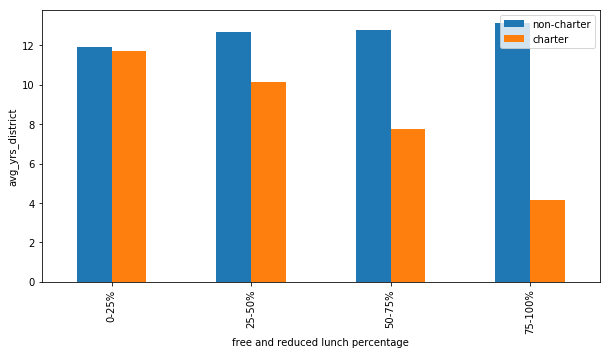

In [15]:
analyzer.plot_charter_noncharter_yrsdistrict(df)

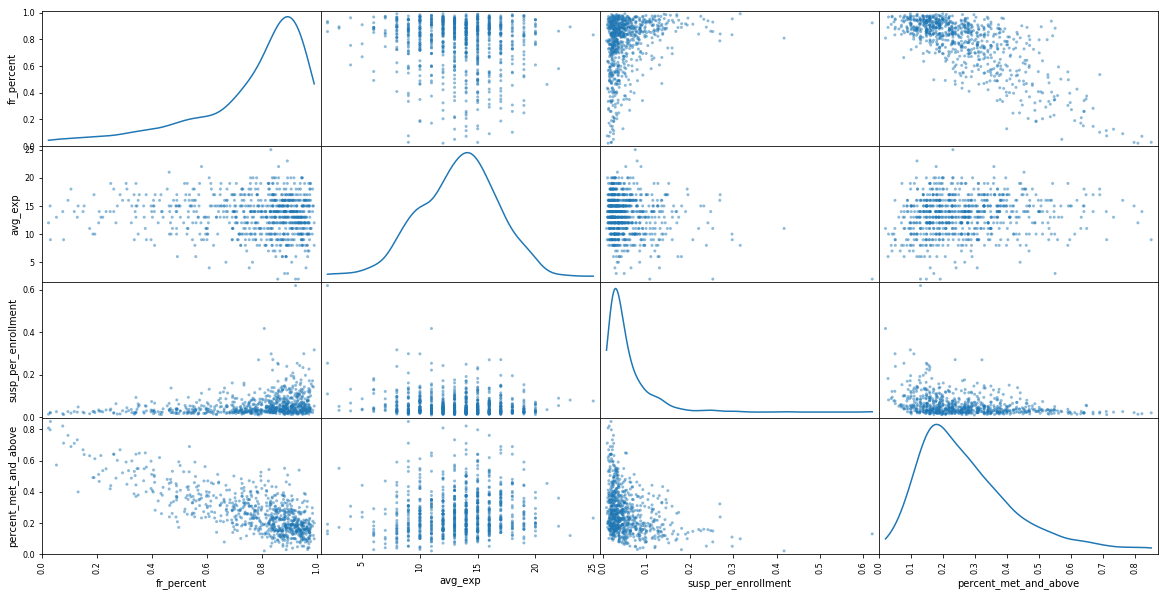

In [16]:
analyzer.corr_scatter(df)

In [17]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("tree.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [20]:
tree = analyzer.dec_tree(df)
visualize_tree(tree[0], tree[1])

Best depth is 2 with accuracy 0.574123989218
['enrollment', 'charter', 'fr_percent', 'student_teacher_ratio', 'student_admin_ratio', 'avg_exp', 'avg_yrs_district', 'dropouts_per_enrollment', 'susp_per_enrollment', 'district_budget_per_student']
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


In [21]:
analyzer.random_forest(df)

Best depth is 4 and best n-estimators is 19 with accuracy 0.614555256065
['enrollment', 'charter', 'fr_percent', 'student_teacher_ratio', 'student_admin_ratio', 'avg_exp', 'avg_yrs_district', 'dropouts_per_enrollment', 'susp_per_enrollment', 'district_budget_per_student']
[ 0.02927449  0.00345691  0.70975474  0.01570303  0.04771317  0.01586006
  0.01156629  0.          0.11481121  0.05186009]


In [22]:
tree = analyzer.dec_tree(df, analyzer.df_processor_low_income)
visualize_tree(tree[0], tree[1])

Best depth is 5 with accuracy 0.456464379947
['enrollment', 'charter', 'student_teacher_ratio', 'student_admin_ratio', 'avg_exp', 'avg_yrs_district', 'dropouts_per_enrollment', 'susp_per_enrollment', 'district_budget_per_student']
[ 0.06244812  0.          0.14364802  0.13387185  0.03400276  0.05604861
  0.          0.37370932  0.19627133]


In [39]:
df['district_budget_per_student_quartile'] = pd.qcut(df['district_budget_per_student'], 4, labels=False)
df.head(n=5)

,school_name,test_id,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,dropouts_per_enrollment,susp_per_enrollment,district_budget_per_student,percent_met_and_above,sbac_quantile,student_teacher_ratio_quartile,district_budget_per_student_quartile
1,A. E. Arnold Elementary,math,728,False,0.268,0.363,24.266667,728.000000,17,15,0,0.0,4606.979762,0.620166,3,3,0
3,A. J. Cook Elementary,math,355,False,0.499,0.643,21.515152,355.000000,17,17,0,0.0,5809.952892,0.777819,3,2,3
5,A. J. Dorsa Elementary,math,489,False,0.759,0.908,25.076923,489.000000,16,13,0,0.0,7096.845521,0.219198,0,3,3
7,A. L. Conner Elementary,math,328,False,0.875,0.945,19.294118,164.000000,11,10,0,0.0,5355.944281,0.181734,0,0,2
9,Abby Reinke Elementary,math,808,False,0.119,0.148,21.837838,269.333333,18,15,0,0.0,4552.128680,0.666822,3,2,0


In [48]:
df_grouped = df[df['fr_percent'] > 0.7]
df_grouped = df_grouped.groupby('district_budget_per_student_quartile').mean()
df_grouped.head(n=5)

,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,dropouts_per_enrollment,susp_per_enrollment,district_budget_per_student,percent_met_and_above,sbac_quantile,student_teacher_ratio_quartile
district_budget_per_student_quartile,,,,,,,,,,,,,,
0,504.214286,0.089286,0.763393,0.858190,21.536351,374.476238,12.437500,10.517857,0.0,0.030122,2965.866219,0.243801,0.717262,1.395833
1,552.182320,0.033149,0.735594,0.835740,22.928892,433.649774,13.201657,11.574586,0.0,0.026082,5005.410481,0.247532,0.718232,1.773481
2,571.419697,0.074242,0.775456,0.873061,20.202653,404.249869,15.469697,14.246970,0.0,0.008129,5508.610607,0.259633,0.795455,1.019697
3,588.031657,0.018622,0.769797,0.871873,21.913017,459.492191,14.147114,12.584730,0.0,0.019456,6192.192865,0.250669,0.733706,1.683426


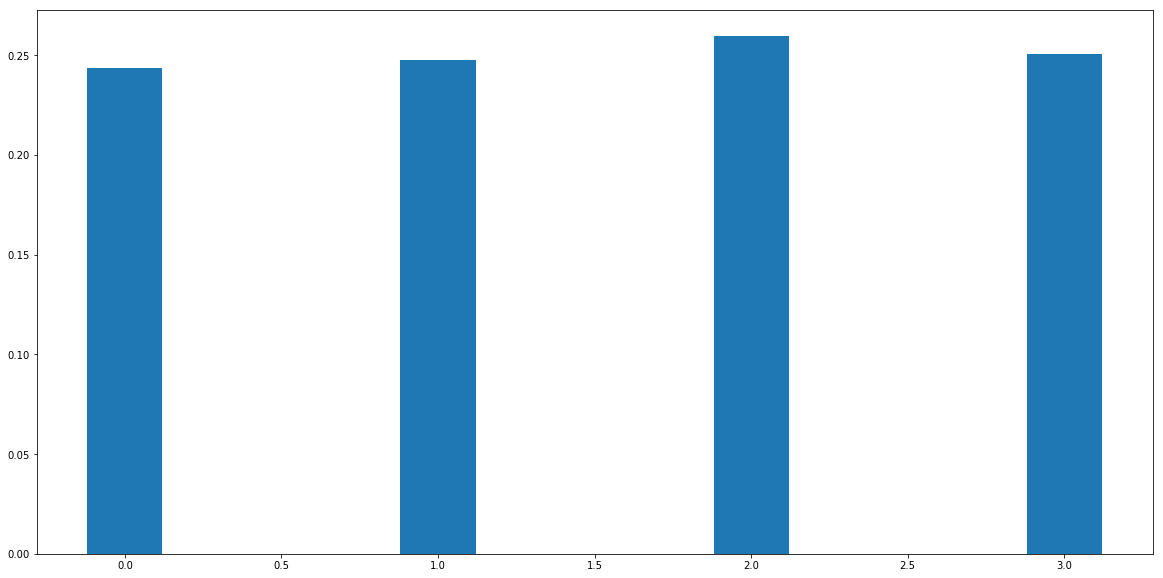

In [49]:
plt.bar(df_grouped.index, df_grouped['percent_met_and_above'], align='center', width = 0.24, alpha=1)
plt.show()